In [ ]:
#Goal - only filtering for Voights creek hatchery and then keeping brood year in the dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [20]:
from sys import platform
if platform == "linux" or platform == "linux2":
    data_string = "/home/maria/Documents/data/pied_piper/puyallup/"
    output_string = "/home/maria/Documents/output/pied_piper/puyallup/"

elif platform == "win32"or platform == "win64":
    data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/"
    output_string = "C:/Users/maria/OneDrive/Documents/output/pied_piper/puyallup/"

In [3]:
df = pd.read_csv("https://www.rmis.org/reports/CSV17200.txt")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df)   

,tag_type,species,run,brood_year,first_release_date,last_release_date,release_location_code,hatchery_location_code,release_stage,release_strategy,avg_length,cwt_1st_mark,cwt_1st_mark_count,cwt_2nd_mark,cwt_2nd_mark_count,non_cwt_1st_mark,non_cwt_1st_mark_count,non_cwt_2nd_mark,non_cwt_2nd_mark_count,counting_method,tag_loss_rate,release_location_name,hatchery_location_name,release_location_rmis_basin,tagged_adclipped,tagged_unclipped,untagged_adclipped,untagged_unclipped,untagged_unknown
0,NaN,5,3.0,2015,20160316,20160316,3F10511 100029 R,3F10511 100029 H,F,FR,51.0,NaN,NaN,NaN,NaN,0.0,66820.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,66820,0
1,16.0,3,4.0,2015,20160424,20160509,3F10511 100031 R,3F10511 100029 H,S,VO,NaN,NaN,NaN,NaN,NaN,0.0,828.0,NaN,NaN,B,NaN,WHITE R 10.0031,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,828,0
2,12.0,2,3.0,2020,20220523,20220523,3F10511 100600 R04,3F10511 100414 H,S,FR,145.0,5000.0,51110.0,NaN,NaN,5000.0,10889.0,NaN,NaN,B,0.0129,KAPOWSIN LK NET PENS,VOIGHTS CR HATCHERY,PUYA,51110,0,10889,0,0
3,NaN,5,3.0,2017,20180308,20180308,3F10511 100029 R,3F10511 100029 H,F,VO,50.0,NaN,NaN,NaN,NaN,0.0,89800.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,89800,0
4,NaN,5,3.0,2017,20180312,20180312,3F10511 100029 R,3F10511 100029 H,F,VO,49.0,NaN,NaN,NaN,NaN,0.0,707850.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,707850,0
5,NaN,5,3.0,2017,20180320,20180320,3F10511 100029 R,3F10511 100029 H,F,VO,49.0,NaN,NaN,NaN,NaN,0.0,367800.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,367800,0
6,NaN,5,3.0,2017,20180308,20180308,3F10511 100029 R,3F10511 100029 H,F,VO,51.0,NaN,NaN,NaN,NaN,0.0,91920.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,91920,0
7,NaN,5,3.0,2017,20180327,20180327,3F10511 100029 R,3F10511 100029 H,F,VO,52.0,NaN,NaN,NaN,NaN,0.0,91900.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,91900,0
8,NaN,5,3.0,2017,20180308,20180308,3F10511 100029 R,3F10511 100029 H,F,VO,50.0,NaN,NaN,NaN,NaN,0.0,89800.0,NaN,NaN,B,NaN,DIRU CR 10.0029,PUYALLUP TRIBAL HATCHERY,PUYA,0,0,0,89800,0
9,NaN,2,3.0,2016,20180515,20180515,3F10511 100027 H01,3F10511 100414 H,S,FR,125.0,NaN,NaN,NaN,NaN,5000.0,144190.0,NaN,NaN,B,NaN,CLARKS CRK HATCHERY,VOIGHTS CR HATCHERY,PUYA,0,0,144190,0,0


In [12]:
df['first_release_date'] =  pd.to_datetime(df['first_release_date'], format='%Y%m%d')
df['last_release_date'] =  pd.to_datetime(df['last_release_date'], format='%Y%m%d')
df['total'] = (df['tagged_adclipped'] + df['tagged_unclipped'] + df['untagged_adclipped'] + 
               df['untagged_unclipped'] + df['untagged_unknown'])
df['unclipped'] = (df['tagged_unclipped'] + df['untagged_unclipped'] + df['untagged_unknown'])
df['prop_unclipped'] = df['unclipped']/df['total']
df['unmarked'] = df['untagged_unclipped']+ df['untagged_unknown']
df['prop_untagged_unclipped'] = (df['untagged_unclipped']+ df['untagged_unknown'])/df['total']

In [13]:
subset_df = df[(df['first_release_date'].dt.year >= 2004) & (df['first_release_date'].dt.year <= 2023)]
chinook_subset_df = subset_df[(subset_df['species'] == 1)]
chinook_voights_df = chinook_subset_df[chinook_subset_df['hatchery_location_name'] == 'VOIGHTS CR HATCHERY']

In [14]:
subset_subset_df = chinook_voights_df[['brood_year','first_release_date','species','hatchery_location_name',
                                       'prop_untagged_unclipped','unmarked','total']]
subset_subset_df['age'] = subset_subset_df['first_release_date'].dt.year - subset_subset_df['brood_year'] 
subset_subset_df = subset_subset_df.sort_values(by='first_release_date')
subset_age_df = subset_subset_df[subset_subset_df['age'] == 1]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(subset_age_df)

<ipython-input-14-d6349776927a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_subset_df['age'] = subset_subset_df['first_release_date'].dt.year - subset_subset_df['brood_year']


,brood_year,first_release_date,species,hatchery_location_name,prop_untagged_unclipped,unmarked,total,age
405,2003,2004-05-26,1,VOIGHTS CR HATCHERY,0.012500,18063,1445000,1
444,2003,2004-05-26,1,VOIGHTS CR HATCHERY,0.000040,8,201664,1
439,2004,2005-05-25,1,VOIGHTS CR HATCHERY,0.000000,0,202442,1
205,2004,2005-05-25,1,VOIGHTS CR HATCHERY,0.000000,0,700508,1
291,2005,2006-05-30,1,VOIGHTS CR HATCHERY,0.008900,10698,1202000,1
365,2005,2006-05-30,1,VOIGHTS CR HATCHERY,0.000000,0,202632,1
328,2005,2006-06-02,1,VOIGHTS CR HATCHERY,0.008901,2266,254585,1
408,2006,2007-06-05,1,VOIGHTS CR HATCHERY,0.005302,1104,208225,1
350,2006,2007-06-05,1,VOIGHTS CR HATCHERY,0.005302,1061,200129,1
227,2006,2007-06-05,1,VOIGHTS CR HATCHERY,0.005300,4956,935035,1


In [21]:
#aggregate by date
subset_agg = subset_age_df.groupby(['first_release_date']).agg({'total':sum,
                                                        'unmarked':sum})
subset_agg['prop_unmarked'] = subset_agg['unmarked']/subset_agg['total']
subset_agg = subset_agg.reset_index()
subset_agg
#save file
subset_agg.to_csv(data_string+"puyallup_2004-2021_rmis_filtered.csv")

In [23]:
#reading puyallup data
df_puyallup = pd.read_csv(data_string + "puyallup_2004-2021_all_days_w_covariates_edited.csv")

print(df_puyallup)


           Date  Unnamed: 0_x         flow  secchi_depth  In_day  In_night  \
0     2/29/2004           0.0  1050.000000         150.0    8.50     13.75   
1      3/1/2004           1.0   982.000000         150.0   10.75     15.25   
2      3/2/2004           2.0   923.000000         150.0   10.25     13.75   
3      3/3/2004           3.0   955.000000         150.0   10.25     14.25   
4      3/4/2004           4.0  1300.000000         150.0    9.25     15.00   
...         ...           ...          ...           ...     ...       ...   
6368   8/6/2021         217.0  1065.343750          15.0     NaN       NaN   
6369   8/7/2021         218.0  1294.895833          15.0     NaN       NaN   
6370   8/8/2021         219.0  1296.593750          30.0     NaN       NaN   
6371   8/9/2021         220.0   875.979167          15.0     NaN       NaN   
6372  8/10/2021         221.0   953.031250          12.0     NaN       NaN   

         In  chinook0_wild_num_day  chinook0_wild_perhour_day  

In [26]:
df_puyallup['Date'] = pd.to_datetime(df_puyallup['Date'])
df_merged = df_puyallup.merge(subset_agg, left_on = 'Date', right_on = 'first_release_date', how = 'left')
df_merged.head()

,Date,Unnamed: 0_x,flow,secchi_depth,In_day,In_night,In,chinook0_wild_num_day,chinook0_wild_perhour_day,chinook0_wild_num_night,...,doy,year,doy_original,Unnamed: 0_y,lunar_phase,photoperiod,first_release_date,total,unmarked,prop_unmarked
0,2004-02-29,0.0,1050.0,150.0,8.50,13.75,22.25,0.0,0.000000,0.0,...,60,2004.0,60.0,70,0.581360,11.100000,NaT,NaN,NaN,NaN
1,2004-03-01,1.0,982.0,150.0,10.75,15.25,26.00,0.0,0.000000,2.0,...,61,2004.0,61.0,71,0.672588,11.166667,NaT,NaN,NaN,NaN
2,2004-03-02,2.0,923.0,150.0,10.25,13.75,24.00,1.0,0.097561,0.0,...,62,2004.0,62.0,72,0.758745,11.216667,NaT,NaN,NaN,NaN
3,2004-03-03,3.0,955.0,150.0,10.25,14.25,24.50,0.0,0.000000,0.0,...,63,2004.0,63.0,73,0.836781,11.283333,NaT,NaN,NaN,NaN
4,2004-03-04,4.0,1300.0,150.0,9.25,15.00,24.25,0.0,0.000000,0.0,...,64,2004.0,64.0,74,0.903295,11.333333,NaT,NaN,NaN,NaN


In [30]:
chinook0_list = df_merged['Date'][~np.isnan(df_merged['total'])]
df_merged['chinook0_hatchery_perhour'][chinook0_list.index]+1

87              NaN
451        6.241758
821      251.348837
824             NaN
1192    1833.047619
1566            NaN
2279       4.903226
2642      12.434783
2643      20.040404
2648      88.875000
2671       2.309278
3010      44.080808
3011            NaN
3033       8.323232
3380            NaN
3750       7.410526
4110      62.122449
4472       7.838384
4840      23.833333
5205      60.404494
5569       2.608696
6302            NaN
Name: chinook0_hatchery_perhour, dtype: float64

Text(0, 0.5, 'Log (number of chinook0 hatchery + 1)')

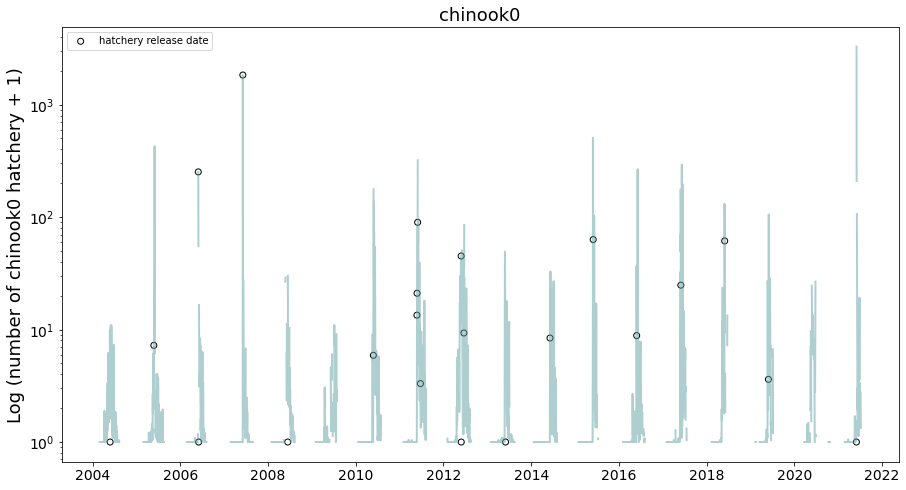

In [31]:
chinook0_list = df_merged['Date'][~np.isnan(df_merged['total'])]
na_list = df_merged['chinook0_hatchery_perhour'][chinook0_list.index]+1
filled_list = na_list.fillna(1)
fig = plt.figure(figsize=(15,8))
plt.plot(df_merged['Date'], df_merged['chinook0_hatchery_perhour']+1, color="cadetblue", alpha = 0.5, linewidth = 2)
plt.yscale("log")
plt.scatter(chinook0_list, filled_list, facecolors='none', 
            color = 'black', label = 'hatchery release date')
plt.legend()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("chinook0",fontsize = 18)
plt.ylabel("Log (number of chinook0 hatchery + 1)",fontsize = 18)

In [32]:
#find max hatchery between release and 50 days later
chinook0_hatchery_list = []
chinook0_wild_list = []
chinook0_prop_wild_list = []
fig = plt.figure(figsize=(15,10))
for i in chinook0_list.index:
    print(i)
    if len(df_merged['chinook0_hatchery_perhour']) < i+50:
        length_dataframe =  len(df_merged['chinook0_hatchery_perhour'])
    else:
        length_dataframe = i+50
    print(length_dataframe)
    if np.isnan(np.max(df_merged['chinook0_hatchery_perhour'][i:length_dataframe])):
        continue
    else:
        index = df_merged['chinook0_hatchery_perhour'][df_merged['chinook0_hatchery_perhour']==
                                                np.max(df_merged['chinook0_hatchery_perhour'][i:length_dataframe])].index[0]
    
    
    chinook0_hatchery_list.append(df_merged['chinook0_hatchery_perhour'][index])
    chinook0_wild_list.append(df_merged['chinook0_wild_perhour'][index])
    chinook0_prop_wild_list.append(df_merged['chinook0_wild_perhour'][index]/(
        df_merged['chinook0_hatchery_perhour'][index]+df_merged['chinook0_wild_perhour'][index]))

87
137
451
501
821
871
824
874
1192
1242
1566
1616
2279
2329
2642
2692
2643
2693
2648
2698
2671
2721
3010
3060
3011
3061
3033
3083
3380
3430
3750
3800
4110
4160
4472
4522
4840
4890
5205
5255
5569
5619
6302
6352


<Figure size 1080x720 with 0 Axes>

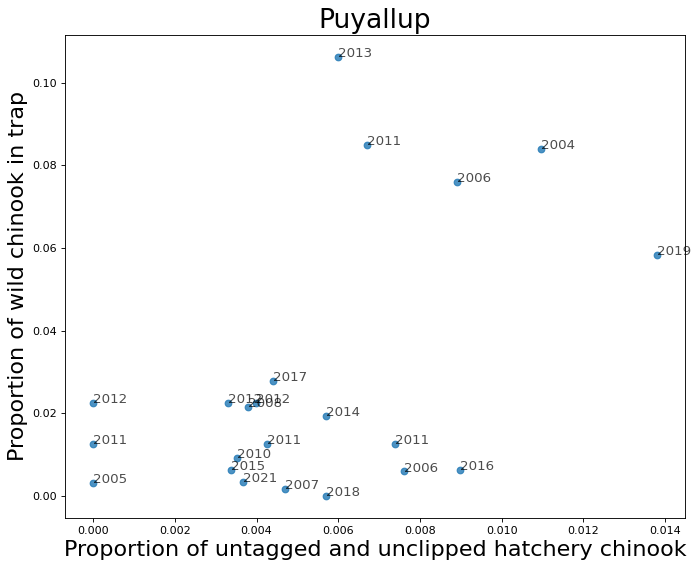

In [40]:
plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(df_merged['prop_unmarked'][chinook0_list.index], chinook0_prop_wild_list, alpha = 0.8)
plt.xlabel('Proportion of untagged and unclipped hatchery chinook', fontsize =20)
plt.ylabel('Proportion of wild chinook in trap', fontsize = 20)
plt.title('Puyallup', fontsize = 24)
for i in range(len(chinook0_list.index)):
    if np.isnan(df_merged['year'][chinook0_list.index[i]]):
        print("is nan")
        year = df_merged['Date'].dt.year[chinook0_list.index[i]]
    else:
        year = df_merged['year'][chinook0_list.index[i]]
#     print(year)
    plt.annotate(int(year),(
    df_merged['prop_unmarked'][chinook0_list.index[i]], chinook0_prop_wild_list[i]), fontsize = 12, alpha = 0.7)
plt.savefig(output_string + 'proportion_unmarked_fish.jpeg')

In [20]:
df_merged['chinook0_wild_prop'] = df_merged['chinook0_wild_num']/(
    df_merged['chinook0_hatchery_num']+df_merged['chinook0_wild_num'])

C:\Users\maria\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


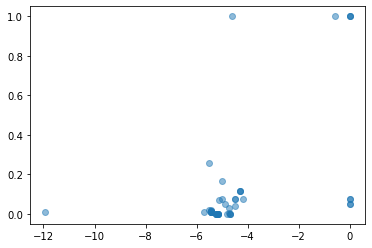

In [36]:
#make scatter plot of prop wild and prop_untagged_unclipped

plt.scatter(np.log(df_merged['prop_untagged_unclipped']), df_merged['chinook0_wild_prop'], alpha = 0.5)
# plt.xlim([-0.001,0.02])
# plt.ylim([-0.01,0.4])

In [37]:
#save file
df_merged.to_csv(data_string+"puyallup_2004-2021_rmis.csv")

In [47]:
subset_agg = subset_df[subset_df['species']==1].groupby(['first_release_date','release_stage']).agg({'total':sum,
                                                        'untagged_unknown':sum,
                                                        'untagged_unclipped':sum})
subset_agg['unmarked'] = subset_agg['untagged_unknown'] + subset_agg['untagged_unclipped']
subset_agg['prop_unmarked'] = subset_agg['unmarked']/subset_agg['total']
subset_agg

total  untagged_unknown  \
first_release_date release_stage                              
2004-06-02         G               103200                 0   
2005-06-01         G               100400                 0   
2007-04-12         G               223740                 0   
2007-05-29         G                82927                 0   
2008-05-22         G                97000                 0   
2008-05-23         G               261240                 0   
                   S               157000                 0   
2010-06-06         G               894000                 0   
2011-05-17         G               901800                 0   
2012-04-01         Y               128000                 0   
2012-05-16         G                10185                 0   
2012-05-17         G              1465700                 0   
2014-05-23         G              1126356                 0   
2015-05-20         G               216800                 0   
2023-01-03         F               256500                 0   
2023-01-20         F               200000                 0   

                                  untagged_unclipped  unmarked  prop_unmarked  
first_release_date release_stage                                               
2004-06-02         G                             546       546       0.005291  
2005-06-01         G                               0         0       0.000000  
2007-04-12         G                          223740    223740       1.000000  
2007-05-29         G                            2012      2012       0.024262  
2008-05-22         G                               0         0       0.000000  
2008-05-23         G                               0         0       0.000000  
                   S                               0         0       0.000000  
2010-06-06         G                          894000    894000       1.000000  
2011-05-17         G                          901800    901800       1.000000  
2012-04-01         Y                            1280      1280       0.010000  
2012-05-16         G                             115       115       0.011291  
2012-05-17         G                          527539    527539       0.359923  
2014-05-23         G                         1023325   1023325       0.908527  
2015-05-20         G                          216800    216800       1.000000  
2023-01-03         F                          256500    256500       1.000000  
2023-01-20         F                          200000    200000       1.000000